## Stakeholder
The government wants to promote their tourism and see how they can improve it and advertise it

<br>1st scenario: we do a clustering to separate "target groups" for advertising
<br>2nd scenario: we do a linear regression and find out, which features to use in our model 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# import of the linear regression model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV, SGDClassifier
# import of our evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# import to divide our data into train and test data
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold, cross_val_predict, KFold
from numpy import mean, std, absolute
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#import the python file
import metrics, error_analysis
import warnings
warnings.filterwarnings('ignore')
RSEED = 42

In [2]:
#loading csv file
df = pd.read_csv('data/Train.csv')

In [3]:
#looking at the data
df.head(2)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5


In [4]:
df.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'most_impressing',
       'total_cost'],
      dtype='object')

In [5]:
#maybe the people who are taking tour package are spending more money so this might be important for tourism dept
df['tour_arrangement'].value_counts()

tour_arrangement
Independent     2570
Package Tour    2239
Name: count, dtype: int64

Looking at the features (purpose, main_activity, payment_mode, most_impressing) in details.

In [6]:
df['purpose'].unique()

array(['Leisure and Holidays', 'Visiting Friends and Relatives',
       'Business', 'Meetings and Conference', 'Volunteering',
       'Scientific and Academic', 'Other'], dtype=object)

In [7]:
df['main_activity'].unique()

array(['Wildlife tourism', 'Cultural tourism', 'Mountain climbing',
       'Beach tourism', 'Conference tourism', 'Hunting tourism',
       'Bird watching', 'business', 'Diving and Sport Fishing'],
      dtype=object)

In [8]:
df['payment_mode'].unique()

array(['Cash', 'Credit Card', 'Other', 'Travellers Cheque'], dtype=object)

In [9]:
df['most_impressing'].unique()
#df['most_impressing'].nunique()

array(['Friendly People', 'Wonderful Country, Landscape, Nature',
       'Excellent Experience', 'No comments', ' Wildlife', nan,
       'Good service', 'Satisfies and Hope Come Back'], dtype=object)

In [10]:
# lets look at the descriptive statistics
df.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost
count,4806.000000,4804.000000,4809.000000,4809.000000,4.809000e+03
mean,0.926758,1.009575,8.488043,2.304429,8.114389e+06
std,1.288242,1.138865,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,49.000000,44.000000,145.000000,61.000000,9.953288e+07


In [11]:
# looking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [12]:
# looking at the total null values
df.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [13]:
# What are the different countries people are coming from?
#df.country.nunique()
df.country.value_counts()


country
UNITED STATES OF AMERICA    695
UNITED KINGDOM              533
ITALY                       393
FRANCE                      280
ZIMBABWE                    274
                           ... 
NIGER                         1
MYANMAR                       1
DOMINICA                      1
TUNISIA                       1
ESTONIA                       1
Name: count, Length: 105, dtype: int64

#### Observation: Dominica and Tunisia are the countries, where people spend most, but just 1 observation in data

<Axes: ylabel='age_group,country'>

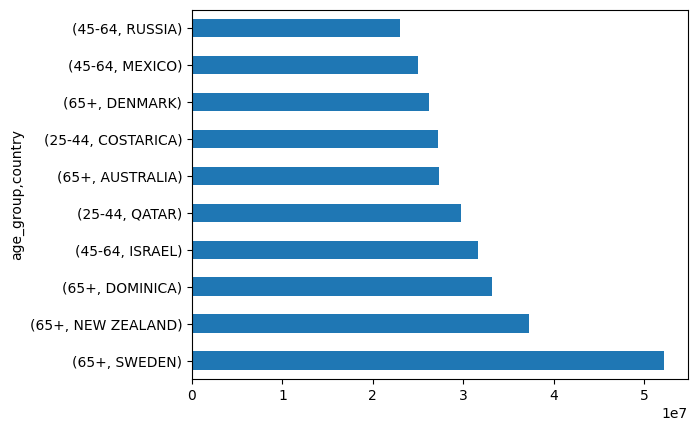

In [14]:
# grouping the age and country and looking at the expenditure again
df.groupby(['age_group', 'country'])['total_cost'].mean().sort_values(ascending=False).head(10).plot(kind='barh')

In [15]:
# checking if DOminica is a real observation or if there is a mistake
df.loc[df['country'] == 'DOMINICA']


,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
381,tour_1467,DOMINICA,65+,Spouse and Children,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,No,Yes,5.0,0.0,Credit Card,Yes,Friendly People,33150000.0


#### Observation: It is an explainable outlier hence it stays in the dataset <br>


## Data Cleaning

In [16]:
# there are some zero values in total female and total male although there is an actual observation because in travel_with column there are values
df.query('total_male == 0 and total_female == 0').head(2)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
170,tour_1205,UNITED STATES OF AMERICA,25-44,Spouse,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Radio, TV, Web",Package Tour,...,Yes,No,Yes,No,5.0,4.0,Credit Card,No,Excellent Experience,1657500.0
705,tour_1867,HUNGARY,45-64,Spouse and Children,0.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,4.0,0.0,Cash,Yes,Wildlife,7646047.5


In [17]:
#create a copy data frame for data cleaning
df_clean = df

In [18]:
#have a closer look at the NaN values of total_male
df_clean[df_clean['total_male'].isna()].head(2)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
1017,tour_2246,UNITED STATES OF AMERICA,45-64,Friends/Relatives,4.0,NaN,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,19.0,0.0,Cash,Yes,NaN,7293000.0
1473,tour_2810,SPAIN,45-64,Friends/Relatives,7.0,NaN,Other,Hunting tourism,"Travel, agent, tour operator",Package Tour,...,Yes,No,No,Yes,11.0,0.0,Cash,No,"Wonderful Country, Landscape, Nature",56960183.0


In [19]:
#have a closer look at the NaN values of total_female
df_clean[df_clean['total_female'].isna()].head(2)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
490,tour_1604,FRANCE,25-44,Friends/Relatives,NaN,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,Yes,9.0,5.0,Cash,Yes,No comments,313000.0
545,tour_1678,ITALY,1-24,Friends/Relatives,NaN,4.0,Volunteering,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,15.0,0.0,Cash,Yes,No comments,9077320.0


In [20]:
#replacing NaN values in total_male and total_female with 0
df_clean['total_male'] = df_clean['total_male'].fillna(0)
df_clean['total_female'] = df_clean['total_female'].fillna(0)

In [21]:
#create a new column to find out how many people belong to one observation
# we created this feature but after further analysis it didnt increase any importance so we decided not to use it
df_clean['total_visitors']=df_clean['total_female']+df_clean['total_male'] 
df_clean.head(2) 

#drop the total_female and total_male column
# we dropped it initially because we had a new feature but now as we are using it we donot need to drop these two columns
#df_clean = df.drop(['total_female', 'total_male'], axis=1)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,total_visitors
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5,2.0
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,1.0


In [22]:
#show the NaN values for total_visitors
print('The number of null values in the total_visitors column:' , df_clean.total_visitors.isnull().sum())

# replace 0 with 1 in the total_visitors column because there has to be atleast 1 person in the observation. 
df_clean['total_visitors'] = df_clean['total_visitors'].replace(0,1)

The number of null values in the total_visitors column: 0


In [23]:
#create a list of all the columns which are with categories "yes" and "no" and replace it with 0 and 1
column_list = ['package_transport_int','package_accomodation','package_food', 'package_sightseeing','package_guided_tour', 'package_insurance', 'first_trip_tz', 'package_transport_tz']
df_clean[column_list] = df_clean[column_list].replace('Yes', 1)
df_clean[column_list] = df_clean[column_list].replace('No', 0)
df_clean.head(2)

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,total_visitors
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,0,0,0,13.0,0.0,Cash,0,Friendly People,674602.5,2.0
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,0,0,0,14.0,7.0,Cash,1,"Wonderful Country, Landscape, Nature",3214906.5,1.0


In [24]:
#Find the unique values for age_group

df_clean.age_group.unique()

array(['45-64', '25-44', '1-24', '65+'], dtype=object)

In [25]:
# filled NaN values with Not_mentioned in the columns travel_with and most_impressing
df_clean[['travel_with','most_impressing']] = df_clean[['travel_with','most_impressing']].fillna('Not_mentioned')


In [26]:
#Change the columns (object) into categorical
# create a list of all the column names
category_list = ['age_group', 'travel_with', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'payment_mode', 'most_impressing', 'country']
# change the type of all columns to categorical
df_clean[category_list]= df_clean[category_list].astype('category')

In [27]:
#Check for duplicates
df_clean.duplicated().sum()

0

In [28]:
#Check for null values again to be sure
df_clean.isnull().sum()

ID                       0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
payment_mode             0
first_trip_tz            0
most_impressing          0
total_cost               0
total_visitors           0
dtype: int64

In [29]:
# drop the ID column
df_clean = df_clean.drop('ID', axis=1)

## Feature Engineering


In [30]:
#Converting the TZS to US Dollars
exchange_rate =  0.00041
df_clean['total_cost_usd'] = (df_clean['total_cost']* exchange_rate).round(2)

In [31]:
# Create another column to find the cost per person
# we tried this feature but on further analysis decided it doesnt increase any importance so we are not using it
df_clean['cost_per_person'] = df_clean['total_cost_usd']/df['total_visitors']
#drop the total cost because we have now total cost in USD
df_clean = df_clean.drop('total_cost', axis=1)

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   country                4809 non-null   category
 1   age_group              4809 non-null   category
 2   travel_with            4809 non-null   category
 3   total_female           4809 non-null   float64 
 4   total_male             4809 non-null   float64 
 5   purpose                4809 non-null   category
 6   main_activity          4809 non-null   category
 7   info_source            4809 non-null   category
 8   tour_arrangement       4809 non-null   category
 9   package_transport_int  4809 non-null   int64   
 10  package_accomodation   4809 non-null   int64   
 11  package_food           4809 non-null   int64   
 12  package_transport_tz   4809 non-null   int64   
 13  package_sightseeing    4809 non-null   int64   
 14  package_guided_tour    4809 non-null   i

## EDA 

<Axes: >

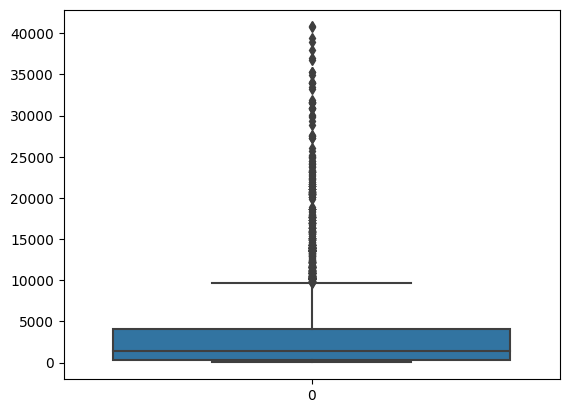

In [33]:
#checking for outliers
sns.boxplot(df_clean['total_cost_usd'])

#### Observation: From the Box plot above we can see we have a lot of outliers in total cost column. There are some observations where the expenditure was quite high.  

In [34]:
#looked at the total_cost column to get an overview 
df_clean.total_cost_usd.describe()

count     4809.000000
mean      3326.899586
std       5012.210201
min         20.090000
25%        332.990000
50%       1393.130000
75%       4077.450000
max      40808.480000
Name: total_cost_usd, dtype: float64

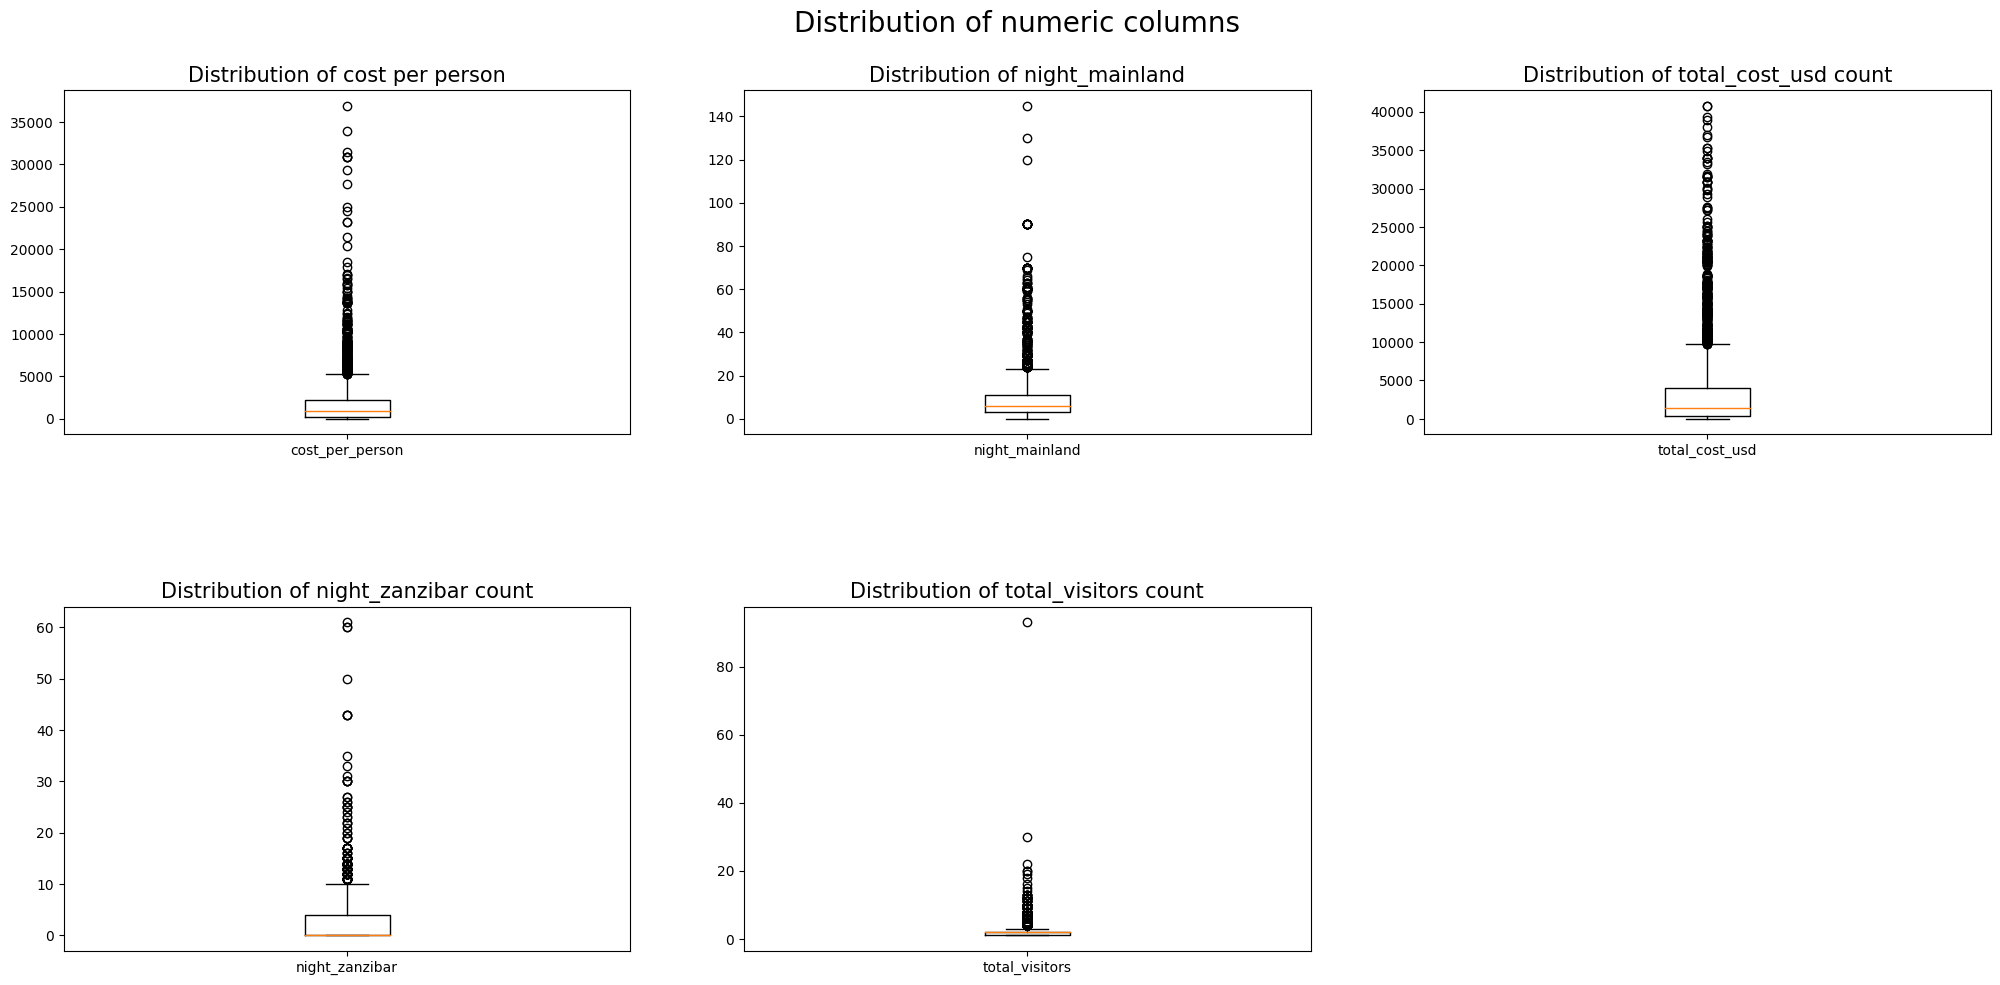

In [35]:
# Distribution of the Numerical columns
fig, ax = plt.subplots(2,3, figsize=(20,10)) # create subplots on 2 rows and 3 columns
plt.suptitle('Distribution of numeric columns', fontsize=20)
fig.tight_layout() # tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area
plt.subplots_adjust(hspace = .5, wspace = .2, top = .9) # adjusts the space between the single subplots

ax[0][0].boxplot(x = df_clean['cost_per_person']) # creates boxplot for number of views
ax[0][0].set_xticklabels(labels=["cost_per_person"]) # sets the label for the ticks on the x-axis
ax[0][0].set_title("Distribution of cost per person", fontsize = 15); # sets title for subplot

ax[0][1].boxplot(x = df_clean['night_mainland'])
ax[0][1].set_xticklabels(labels=["night_mainland"])
ax[0][1].set_title("Distribution of night_mainland", fontsize = 15);

ax[0][2].boxplot(x = df_clean['total_cost_usd'])
ax[0][2].set_xticklabels(labels=["total_cost_usd"])
ax[0][2].set_title("Distribution of total_cost_usd count", fontsize = 15);

ax[1][0].boxplot(x = df_clean['night_zanzibar'])
ax[1][0].set_xticklabels(labels=["night_zanzibar"])
ax[1][0].set_title("Distribution of night_zanzibar count", fontsize = 15);
;
ax[1][1].boxplot(x = df_clean['total_visitors'])
ax[1][1].set_xticklabels(labels=["total_visitors"])
ax[1][1].set_title("Distribution of total_visitors count", fontsize = 15);

fig.delaxes(ax[1][2]);



#### Observation: We looked at the outliers in the column night_mainland. Looking at the rows closely we are assuming these are real values based on the values of other columns. For total_visitors there was an observation for which the value was 90 but looking at the total cost and the cost per person it seems real too.

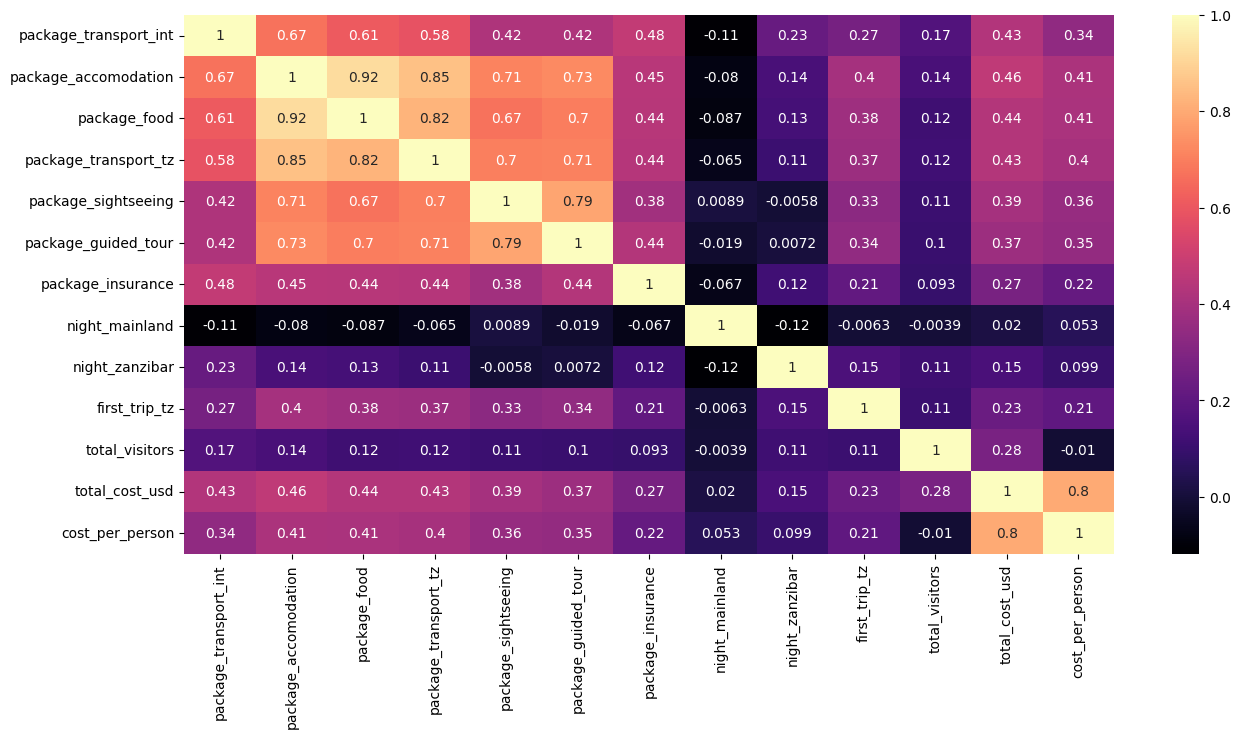

In [36]:
# Looking at the correlation of our features
features = ['package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar',
       'first_trip_tz', 'total_visitors',
       'total_cost_usd', 'cost_per_person']
corr_matrix = df_clean[features].corr()

plt.figure(figsize=(15,7))
sns.heatmap(corr_matrix, annot=True ,cmap="magma")
plt.show()

#### Observation: Total_cost has highest correlation with packages. So people who take packages spend more.

## Plotting and visualization

#### 1. Frequency distribution of the target

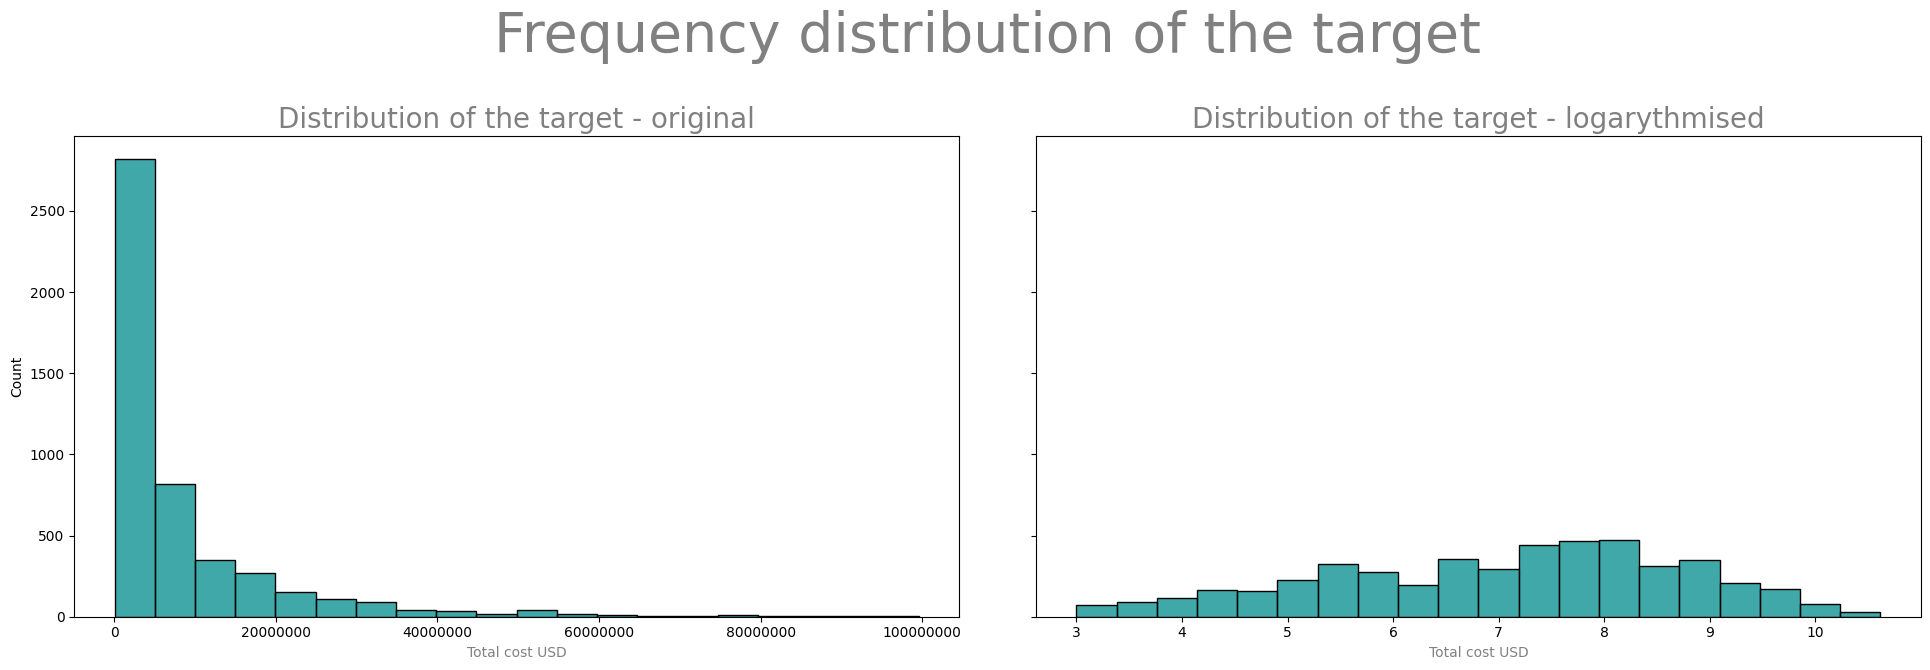

In [37]:
# Set subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 7), sharey=True)
fig.tight_layout(pad=4)

#define subplot titles
ax[0].set_title('Distribution of the target - original', fontsize = 20, color = 'grey')
ax[1].set_title('Distribution of the target - logarythmised', fontsize = 20, color = 'grey')

ax[0].set_xlabel(xlabel='Total cost USD', color = 'grey')
ax[1].set_xlabel(xlabel='Total cost USD', color = 'grey')


#add overall title and adjust it so that it doesn't overla'p with subplot titles

fig.suptitle('Frequency distribution of the target', fontsize = 40, color = 'grey')
plt.subplots_adjust(top=0.85)

#total_cost_usd_original = df_clean['total_cost_usd'].apply(lambda x: np.exp(x))
total_cost_usd_log = df_clean.total_cost_usd.apply(lambda x: np.log(x))

#plotting
sns.histplot(ax = ax[0],
            data = df['total_cost'],
            color= 'darkcyan',
            bins=20)

sns.histplot(ax = ax[1],
            data = total_cost_usd_log,
            #x= 'grade',
            color = 'darkcyan',
            bins=20)


ax[0].ticklabel_format(style='plain', axis='x') #preventing scientific notation
ax[1].ticklabel_format(style='plain', axis='x')


plt.subplots_adjust(top=0.8)

#### 2. Average mean expenditure per age group

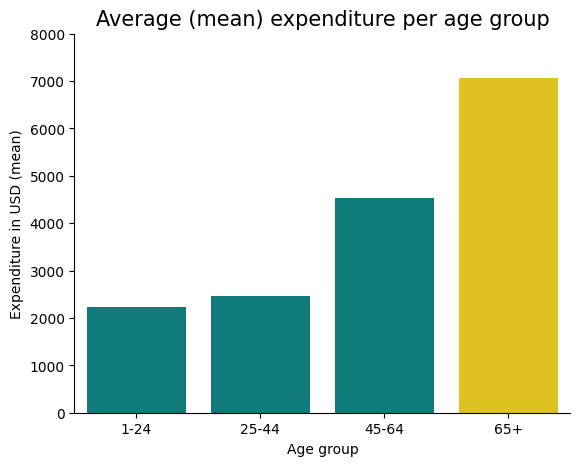

In [38]:
# create dataframe to plot
df_plot = df
exchange_rate =  0.00041
df_plot['total_cost_usd'] = (df['total_cost']* exchange_rate).round(2)

grouped_data = df.groupby('age_group')['total_cost_usd'].mean().reset_index()

cols = ['darkcyan' if x < 6000 else 'gold' for x in grouped_data.total_cost_usd]

#create barplot using specified colors

sns.barplot(data=grouped_data, x='age_group', y='total_cost_usd', palette=cols)

plt.ylim(top=8000)
plt.subplots_adjust(top=.9)
plt.title('Average (mean) expenditure per age group', fontsize=15)
plt.xlabel('Age group')
plt.ylabel('Expenditure in USD (mean)')
sns.despine()

plt.show()

#### 3. Distribution of Categorical columns (info_source, travel_with, purpose, tour_arrangement, purpose_of_trip, age_group)

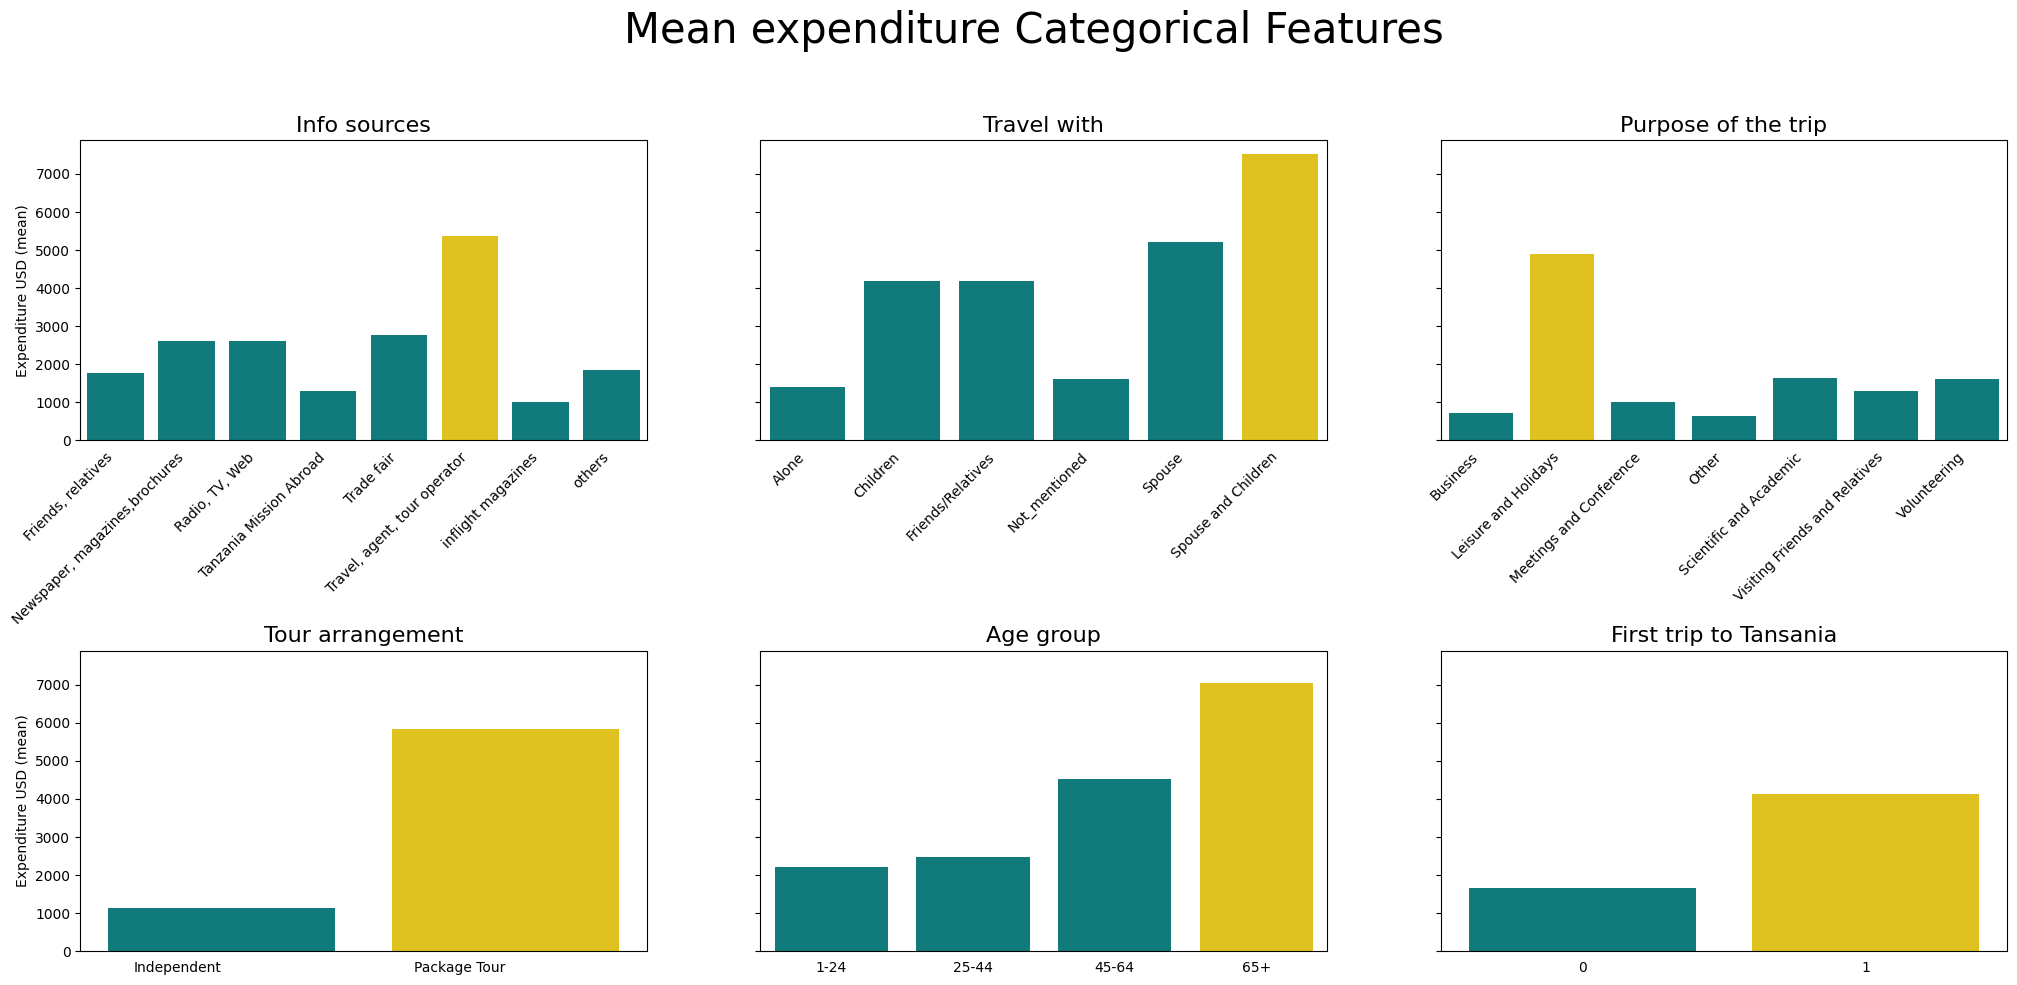

In [39]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10), sharey=True)
plt.suptitle('Mean expenditure Categorical Features', fontsize=30)
fig.tight_layout()
plt.subplots_adjust(hspace=0.7, wspace=0.2, top=0.85)

color = 'darkcyan'


grouped_data_info = df.groupby('info_source')['total_cost_usd'].mean().reset_index()
cols = ['darkcyan' if x < 3000 else 'gold' for x in grouped_data_info.total_cost_usd]
info = sns.barplot(data=grouped_data_info, x='info_source', y='total_cost_usd', palette=cols, ax=ax[0, 0])

ax[0, 0].set_title("Info sources", fontsize=16)
ax[0, 0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45, ha='right')
ax[0, 0].set_xlabel('')
ax[0, 0].set_ylabel('Expenditure USD (mean)')

grouped_data_travel = df.groupby('travel_with')['total_cost_usd'].mean().reset_index()
cols = ['darkcyan' if x < 5500 else 'gold' for x in grouped_data_travel.total_cost_usd]
info = sns.barplot(data=grouped_data_travel, x='travel_with', y='total_cost_usd', palette=cols, ax=ax[0, 1])

ax[0, 1].set_title("Travel with", fontsize=16)
ax[0, 1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=45, ha='right')
ax[0, 1].set_xlabel('')
ax[0, 1].set_ylabel('')

grouped_data_purpose = df.groupby('purpose')['total_cost_usd'].mean().reset_index()
cols = ['darkcyan' if x < 4000 else 'gold' for x in grouped_data_purpose.total_cost_usd]
info = sns.barplot(data=grouped_data_purpose, x='purpose', y='total_cost_usd', palette=cols, ax=ax[0, 2])

ax[0, 2].set_title("Purpose of the trip", fontsize=16)
ax[0, 2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[0, 2].set_xticklabels(ax[0, 2].get_xticklabels(), rotation=45, ha='right')
ax[0, 2].set_xlabel('')
ax[0, 2].set_ylabel('')

grouped_data_tour = df.groupby('tour_arrangement')['total_cost_usd'].mean().reset_index()
cols = ['darkcyan' if x < 4000 else 'gold' for x in grouped_data_tour.total_cost_usd]
info = sns.barplot(data=grouped_data_tour, x='tour_arrangement', y='total_cost_usd', palette=cols, ax=ax[1, 0])

ax[1, 0].set_title("Tour arrangement", fontsize=16)
ax[1, 0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[1, 0].set_xticklabels(ax[1, 0].get_xticklabels(), rotation=0, ha='right')
ax[1, 0].set_xlabel('')
ax[1, 0].set_ylabel('Expenditure USD (mean)')

grouped_data_age = df.groupby('age_group')['total_cost_usd'].mean().reset_index()
cols = ['darkcyan' if x < 5000 else 'gold' for x in grouped_data_age.total_cost_usd]
info = sns.barplot(data=grouped_data_age, x='age_group', y='total_cost_usd', palette=cols, ax=ax[1, 1])

ax[1, 1].set_title("Age group", fontsize=16)
ax[1, 1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=0)
ax[1, 1].set_xlabel('')
ax[1, 1].set_ylabel('')


grouped_data_first = df.groupby('first_trip_tz')['total_cost_usd'].mean().reset_index()
cols = ['darkcyan' if x < 4000 else 'gold' for x in grouped_data_first.total_cost_usd]
info = sns.barplot(data=grouped_data_first, x='first_trip_tz', y='total_cost_usd', palette=cols, ax=ax[1, 2])

ax[1, 2].set_title("First trip to Tansania", fontsize=16)
ax[1, 2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[1, 2].set_xticklabels(ax[1, 2].get_xticklabels(), rotation=0);
ax[1, 2].set_xlabel('')
ax[1, 2].set_ylabel('');
#fig.delaxes(ax[1, 2])

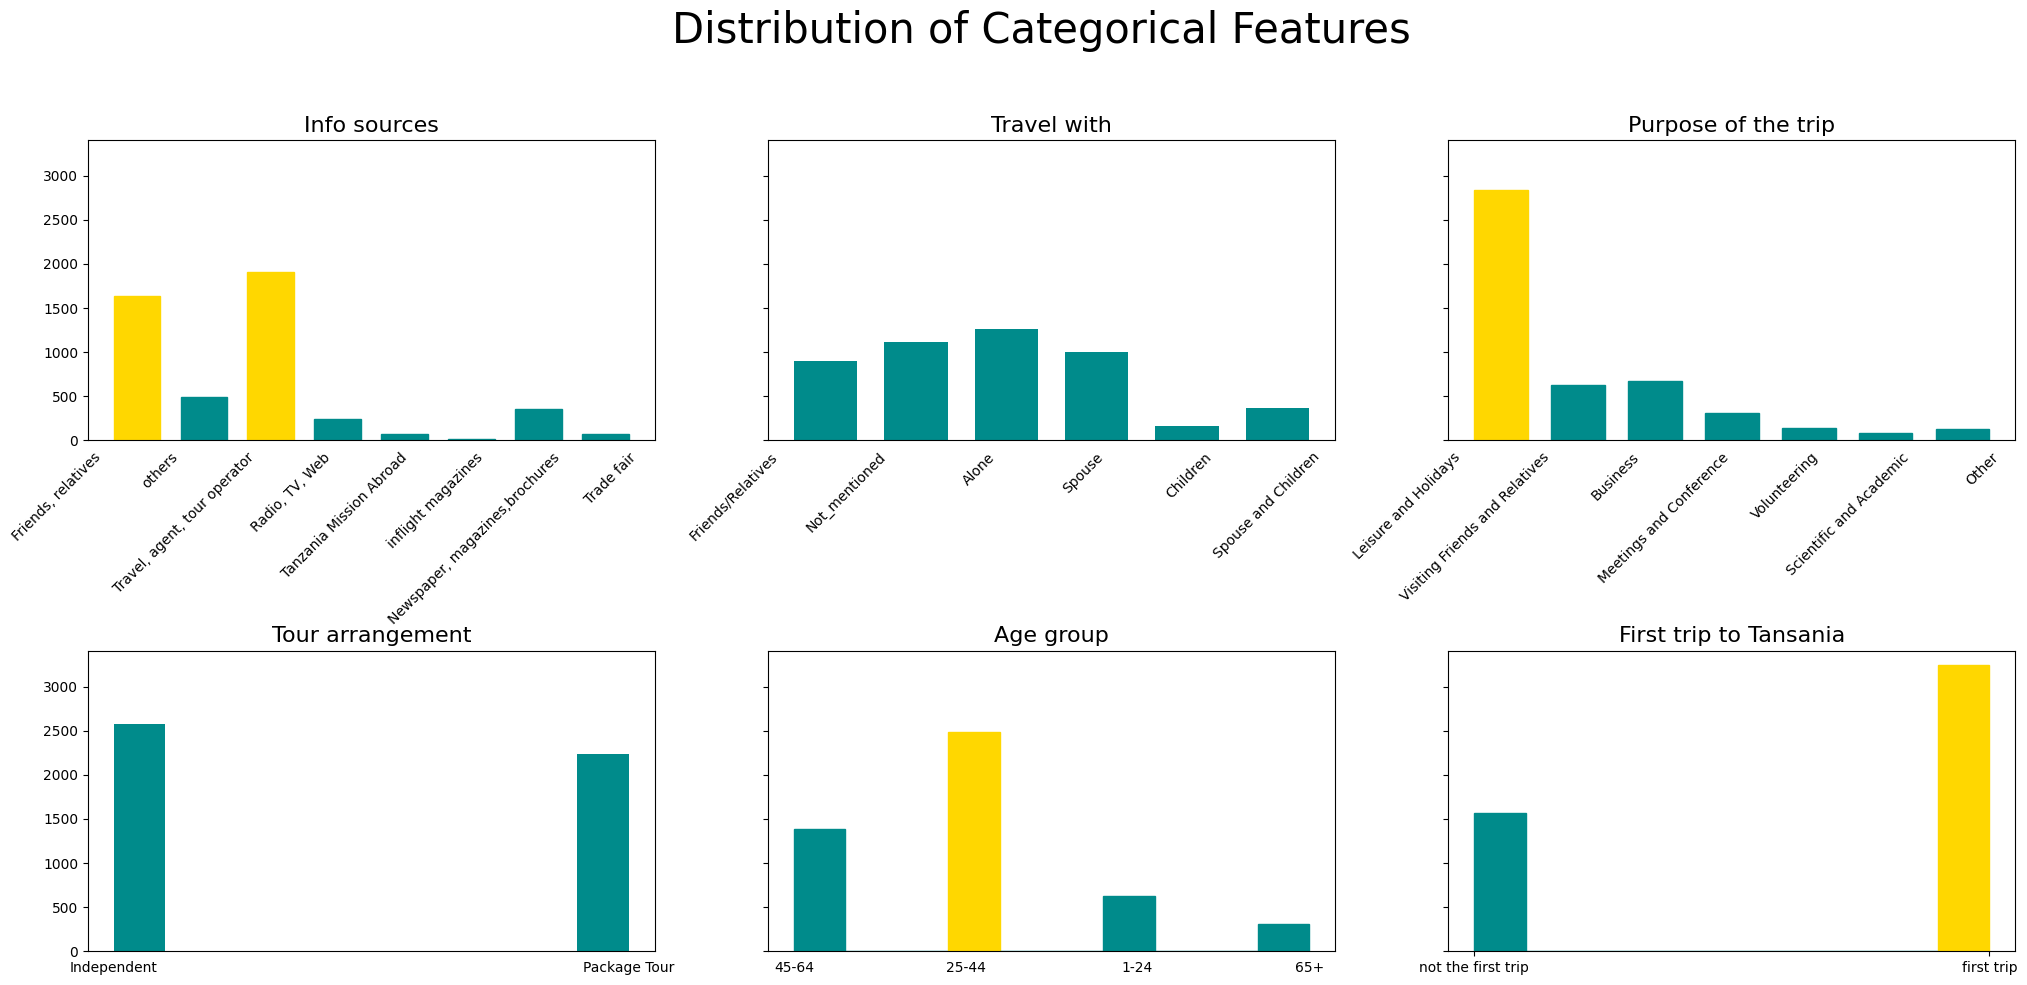

In [40]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10), sharey=True)
plt.suptitle('Distribution of Categorical Features', fontsize=30)
fig.tight_layout()
plt.subplots_adjust(hspace=0.7, wspace=0.2, top=0.85)

color = 'darkcyan'


info = ax[0, 0].hist(x=df['info_source'], bins=8, rwidth=0.7, color=color)
for bar in info[2]:
    if bar.get_height() > 1500:
        bar.set_color('gold')
    else:
        bar.set_color('darkcyan')
ax[0, 0].set_title("Info sources", fontsize=16)
ax[0, 0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=45, ha='right')

ax[0, 1].hist(x=df['travel_with'].astype(str), bins=6, rwidth=0.7, color=color)
ax[0, 1].set_title("Travel with", fontsize=16)
ax[0, 1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[0, 1].set_xticklabels(ax[0, 1].get_xticklabels(), rotation=45, ha='right')

purpose = ax[0, 2].hist(x=df['purpose'], bins=7, rwidth=0.7)
for bar in purpose[2]:
    if bar.get_height() > 2000:
        bar.set_color('gold')
    else:
        bar.set_color('darkcyan')
ax[0, 2].set_title("Purpose of the trip", fontsize=16)
ax[0, 2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[0, 2].set_xticklabels(ax[0, 2].get_xticklabels(), rotation=45, ha='right')

ax[1, 0].hist(x=df['tour_arrangement'], color=color)
ax[1, 0].set_title("Tour arrangement", fontsize=16)
ax[1, 0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)

age = ax[1, 1].hist(x=df['age_group'])
for bar in age[2]:
    if bar.get_height() > 2000:
        bar.set_color('gold')
    else:
        bar.set_color('darkcyan')
ax[1, 1].set_title("Age group", fontsize=16)
ax[1, 1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax[1, 1].set_xticklabels(ax[1, 1].get_xticklabels(), rotation=0)

first_trip = ax[1, 2].hist(x=df['first_trip_tz'])
for bar in first_trip[2]:
    if bar.get_height() > 2000:
        bar.set_color('gold')
    else:
        bar.set_color('darkcyan')
ax[1, 2].set_title("First trip to Tansania", fontsize=16)
#ax[1, 2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
#ax[1, 2].set_xticklabels(ax[1, 2].get_xticklabels(), rotation=0)
ticks=[0,1]
labels=['not the first trip', 'first trip']
ax[1, 2].set_xticks(ticks)
ax[1, 2].set_xticklabels(labels);

#### 4. Total number of users per country


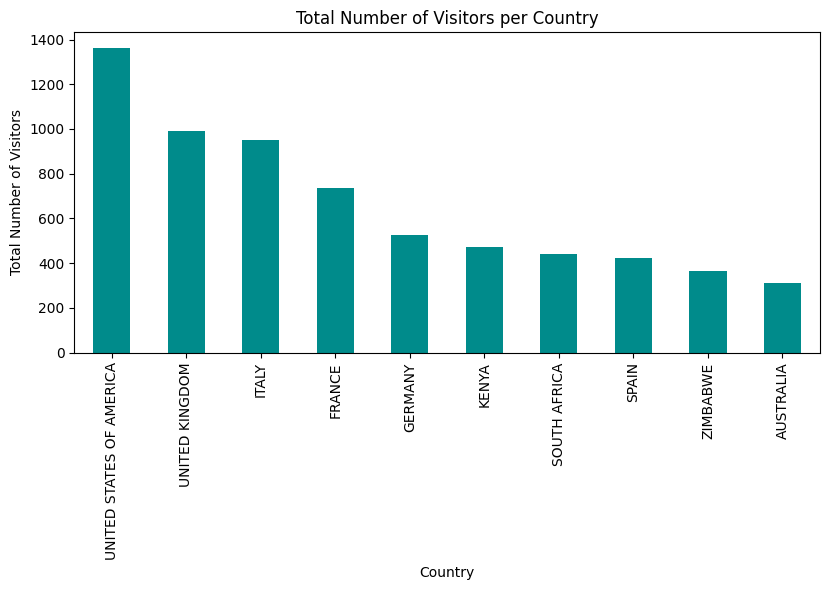

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

#Find the countries with the highest number of visitors
top_countries = df.groupby('country')['total_visitors'].sum().nlargest(10).index

#Create a color palette with 'gold' for the top countries
#color_palette = ['gold' if country in top_countries else 'darkcyan' for country in df['country'].unique()]

plt.figure(figsize=(16, 6))

#Absolute number of visitors per country
plt.subplot(1, 2, 2)
country_visitors = df.groupby('country')['total_visitors'].sum()
top_visitors_countries = country_visitors.loc[top_countries]
ax2 = top_visitors_countries.plot(kind='bar', color='darkcyan')
ax2.set_xlabel('Country')
ax2.set_ylabel('Total Number of Visitors')
ax2.set_title('Total Number of Visitors per Country')

plt.tight_layout()
plt.show()


#### 5. Total money spent per country


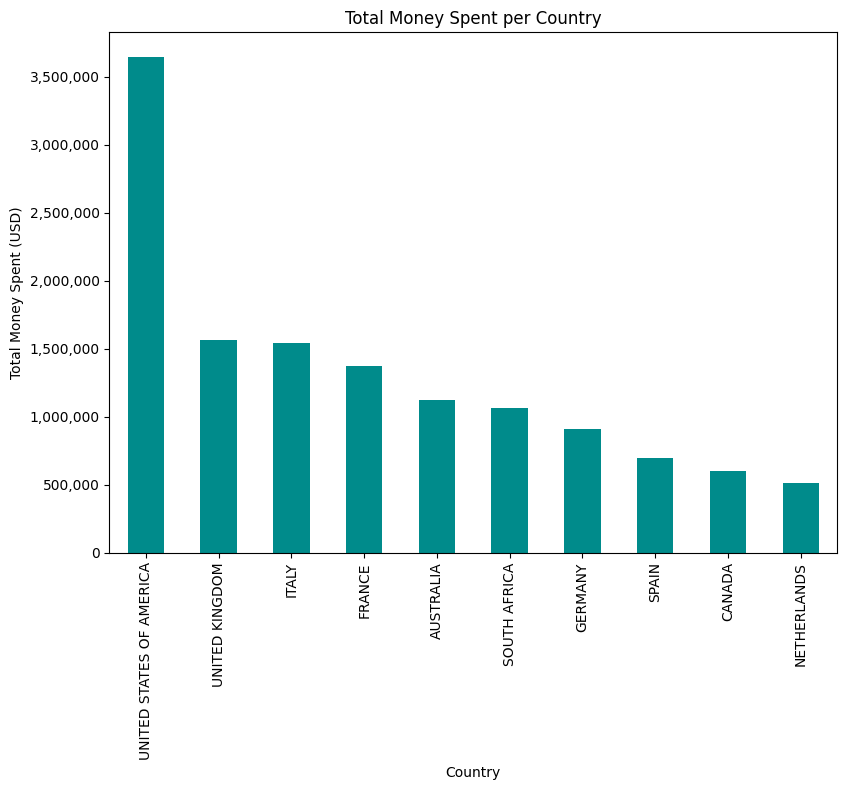

In [42]:
plt.figure(figsize=(16, 8))

#Total money spent per country
country_spending = df.groupby('country')['total_cost_usd'].sum()
top_spending_countries = country_spending.nlargest(10)

#Create a color palette with 'gold' for the top spending countries
#color_palette = ['gold' if country in top_spending_countries.index else 'darkcyan' for country in df['country'].unique()]

#Plotting total money spent per country
ax1 = plt.subplot(1, 2, 2)
top_spending_countries.plot(kind='bar', color='darkcyan', ax=ax1)
ax1.set_xlabel('Country')
ax1.set_ylabel('Total Money Spent (USD)')
ax1.set_title('Total Money Spent per Country')

ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))


plt.tight_layout()
plt.show()

#### 6. Average money spent per gender


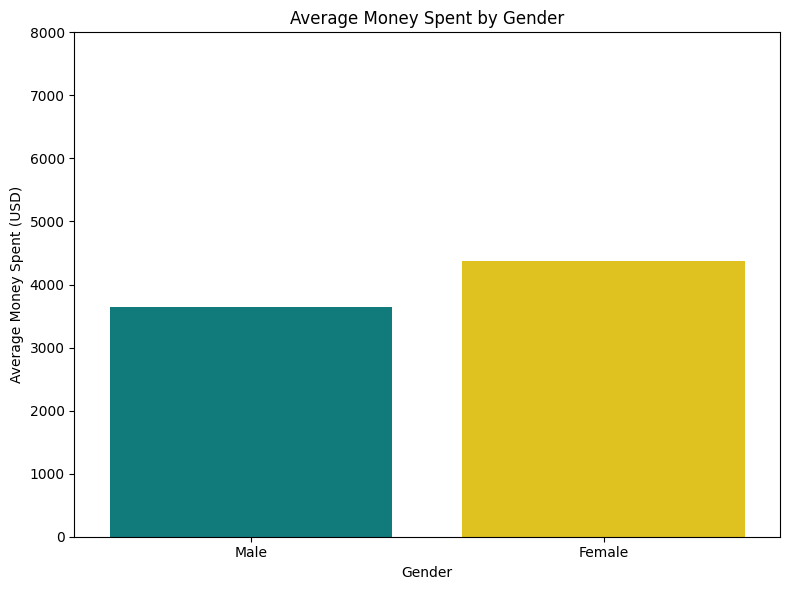

In [43]:

plt.figure(figsize=(8, 6))

# Calculate the average money spent by males and females
average_spending_male = df['total_cost_usd'][df['total_male'] > 0].mean()
average_spending_female = df['total_cost_usd'][df['total_female'] > 0].mean()

# Create a bar plot
sns.barplot(x=['Male', 'Female'], y=[average_spending_male, average_spending_female], palette=['darkcyan', 'gold'])
plt.xlabel('Gender')
plt.ylabel('Average Money Spent (USD)')
plt.ylim(top=8000)

plt.title('Average Money Spent by Gender')

plt.tight_layout()
plt.show()


#### 7. Frequency distribution of packages

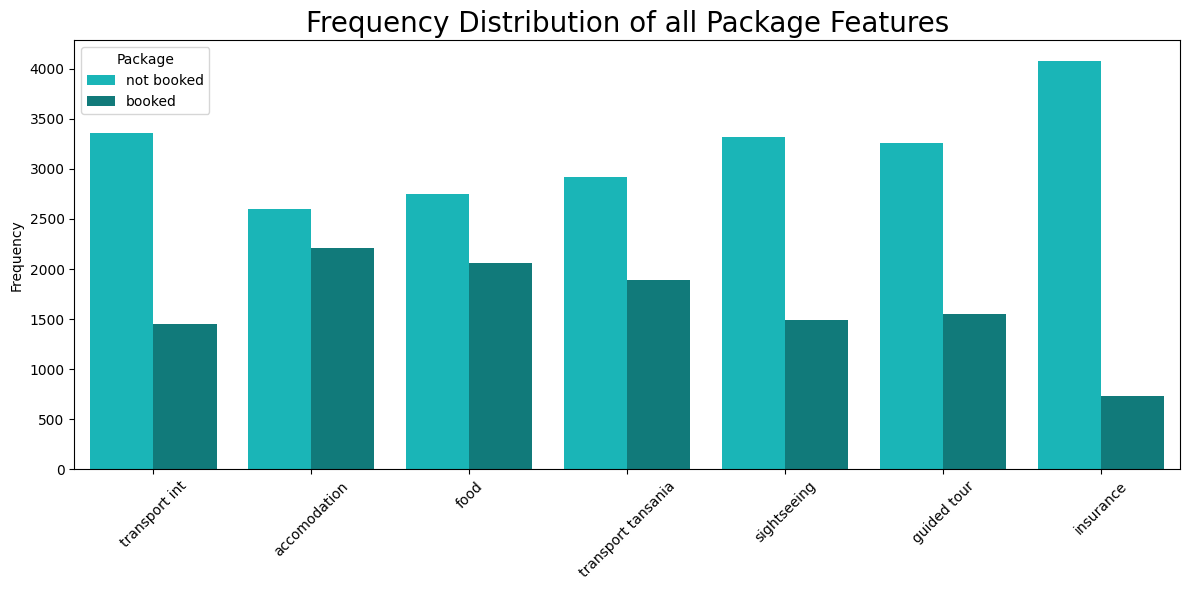

In [44]:

# Assuming we want to create frequency distribution plots for the package-related features
package_features = ['package_transport_int', 'package_accomodation', 'package_food',
                    'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
                    'package_insurance']

# Set the color palette for the plots
color_palette = ['darkturquoise','darkcyan']

# Reshape the data using melt()
melted_data = df_clean.melt(value_vars=package_features)

# Plotting the combined frequency distribution plot
plt.figure(figsize=(12, 6))
sns.countplot(x='variable', hue='value', data=melted_data, palette=color_palette)
plt.xlabel('')
plt.ylabel('Frequency')
x_tick_lst = ['transport int', 'accomodation', 'food', 'transport tansania', 'sightseeing', 'guided tour','insurance']
plt.xticks(ticks=range(len(x_tick_lst)),rotation=45, labels=x_tick_lst, )
plt.title('Frequency Distribution of all Package Features', fontsize=20)
plt.legend(title='Package', loc='upper left', labels = ['not booked', 'booked'])
plt.tight_layout()
plt.show()

#### 8a. Average money spent per booked package (Not Booked)


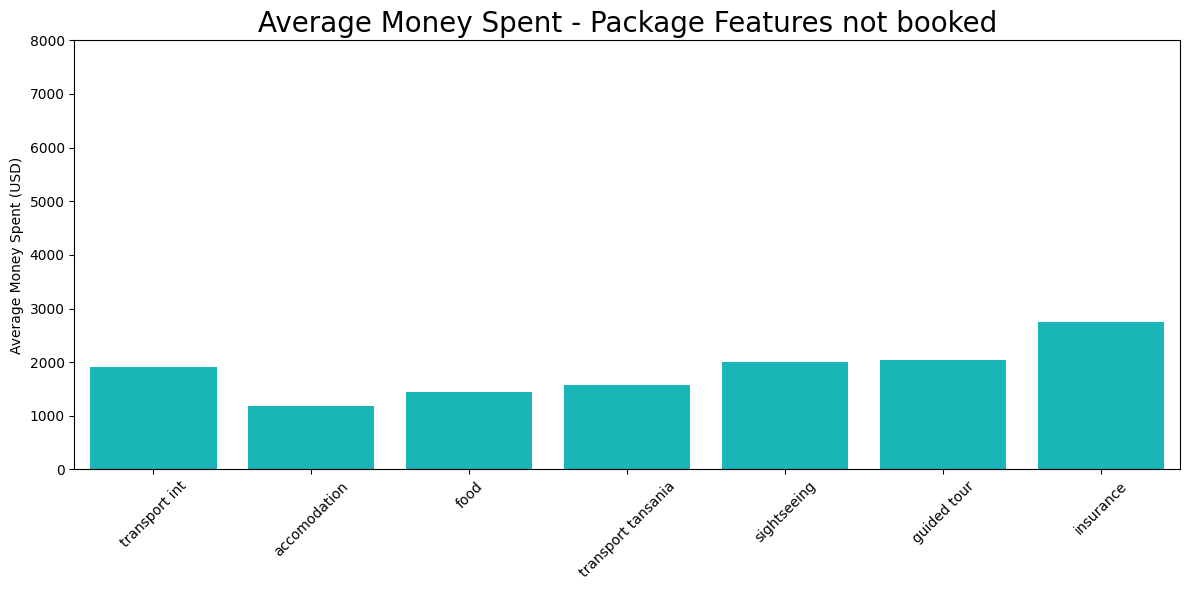

In [45]:
# Assuming we want to create a bar plot for the average money spent for each package-related feature
package_features = ['package_transport_int', 'package_accomodation', 'package_food',
                    'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
                    'package_insurance']

# Calculate the average money spent for each package feature
average_money_spent = []
for feature in package_features:
    average_spent = df_clean.loc[df_clean[feature] == 0, 'total_cost_usd'].mean()
    average_money_spent.append(average_spent)

# Create a DataFrame with the package features and their corresponding average money spent
data = {'Package Features': package_features, 'Average Money Spent': average_money_spent}
average_money_spent_df = pd.DataFrame(data)

# Plotting the average money spent for each package feature
plt.figure(figsize=(12, 6))
sns.barplot(x='Package Features', y='Average Money Spent', data=average_money_spent_df, color='darkturquoise')
#plt.xlabel('Package Features')
plt.ylabel('Average Money Spent (USD)')
plt.xlabel('')
plt.ylim(top=8000)
plt.title('Average Money Spent - Package Features not booked', fontsize=20)
plt.xticks(ticks=range(len(x_tick_lst)),rotation=45, labels=x_tick_lst, )
plt.tight_layout()
plt.show()

#### 8b. Average money spent per booked package (Booked)


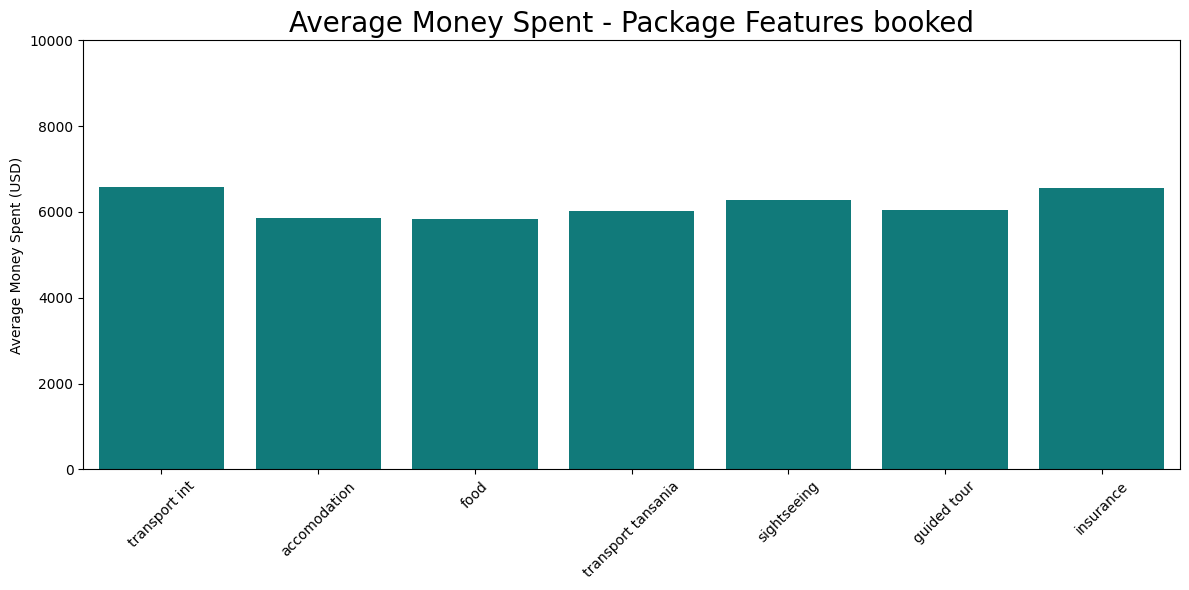

In [46]:
# Assuming we want to create a bar plot for the average money spent for each package-related feature
package_features = ['package_transport_int', 'package_accomodation', 'package_food',
                    'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
                    'package_insurance']

# Calculate the average money spent for each package feature
average_money_spent = []
for feature in package_features:
    average_spent = df_clean.loc[df_clean[feature] == 1, 'total_cost_usd'].mean()
    average_money_spent.append(average_spent)

# Create a DataFrame with the package features and their corresponding average money spent
data = {'Package Features': package_features, 'Average Money Spent': average_money_spent}
average_money_spent_df = pd.DataFrame(data)

# Plotting the average money spent for each package feature
plt.figure(figsize=(12, 6))
sns.barplot(x='Package Features', y='Average Money Spent', data=average_money_spent_df, color='darkcyan')
#plt.xlabel('Package Features')
plt.ylabel('Average Money Spent (USD)')
plt.xlabel('')
plt.ylim(top=10000)
plt.title('Average Money Spent - Package Features booked', fontsize=20)
plt.xticks(ticks=range(len(x_tick_lst)),rotation=45, labels=x_tick_lst, )
plt.tight_layout()
plt.show()

# First results of EDA
* Plotting target variable: From the box plot it is evident that there are a lot of outliers. On a closer look it was observed that the values are real so they were not removed from the data set.<br>
* Average spending by age: people over 45 years old are spending more than people below that age and people over 65 years have highest expenditure on average.
* Average spending per gender: females are spending on average more than males (almost double as much)
* Average spending by main_activity: people who are diving and fishing are spending the most 
* Average spending per purpose: people who are on leisure and holidays are spending more
* Average spending by first_trip: people who are there for the first time are spending on average more. 
* Average spending by payment_mode: people who are using travelers' cheques and credit cards are spending more than people who are using cash or other means of payment.

* Heatmap: Only the columns including packages are correlated with the target variable, but are not very high (between 0.27 and 0.46). People who are opting for packages are spending more
* The number of nights doesn't correlate with the target variable.

# Creating the dummy variables, and dropping some columns


In [47]:
#drop cost per person because of correlation with total cost
df_clean = df_clean.drop(['country', 'cost_per_person', 'total_visitors'], axis=1)

In [48]:
df_clean.columns

Index(['age_group', 'travel_with', 'total_female', 'total_male', 'purpose',
       'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar', 'payment_mode',
       'first_trip_tz', 'most_impressing', 'total_cost_usd'],
      dtype='object')

In [49]:
#creating dummies for categorical variable
df_clean = pd.get_dummies(df_clean, drop_first=True, dtype=float)

In [50]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 53 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   total_female                                          4809 non-null   float64
 1   total_male                                            4809 non-null   float64
 2   package_transport_int                                 4809 non-null   int64  
 3   package_accomodation                                  4809 non-null   int64  
 4   package_food                                          4809 non-null   int64  
 5   package_transport_tz                                  4809 non-null   int64  
 6   package_sightseeing                                   4809 non-null   int64  
 7   package_guided_tour                                   4809 non-null   int64  
 8   package_insurance                                     4809

## Train test split and log transformation on the target 

In [51]:
#defining X and y for the train test split
X = df_clean.drop('total_cost_usd', axis=1)
y = df_clean['total_cost_usd']

In [52]:
y.mean()

3326.899586192556

In [53]:
# Log-transform skewed features using np.log()
y = y.apply(lambda x: np.log(x))

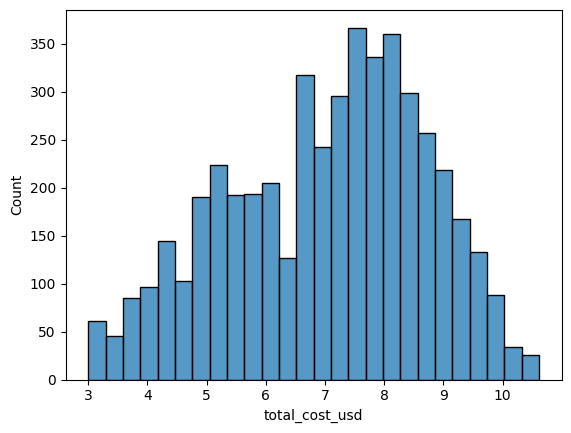

In [54]:
# histplot for log transformed target to check if it is normalized 
sns.histplot(y);

In [55]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RSEED) #didn't type in a test size so we used default value

In [56]:
# scaled the columns 
scaler2 = StandardScaler()
col_scale = ['total_female', 'total_male', 'night_zanzibar', 'night_mainland']
X_train_scaled2 = scaler2.fit_transform(X_train[col_scale]) # why not y_train?
X_test_scaled2 = scaler2.transform(X_test[col_scale])
# It follows the same syntax as the StandardScaler.
# Don't forget: you have to import the scaler at the top of your notebook. 
X_train_all = np.concatenate([X_train_scaled2, X_train.drop(col_scale, axis=1)], axis=1)
X_test_all = np.concatenate([X_test_scaled2, X_test.drop(col_scale, axis=1)], axis=1)
#X = np.concatenate([X, X.drop(col_scale, axis=1)], axis=1)


## Baseline model

In [57]:
# First, simple model which shall predict the expenditure only with the variables “age groups” (0-24, 25-44, 45-64, 65+)
# Model: linear regression model

# define our target and predictor variables
X_train_base = X_train[['age_group_25-44', 'age_group_45-64', 'age_group_65+']]
X_train_base.shape

X_test_base = X_test[['age_group_25-44', 'age_group_45-64', 'age_group_65+']]
X_test_base.shape

(1203, 3)

In [58]:
# Instantiate our model 
lin_reg_base = LinearRegression()
# Fit the model using our train data 
lin_reg_base.fit(X_train_base, y_train)

LinearRegression()

In [59]:
# Make predictions on the test data and save those in "y_pred"
y_pred_test_base = lin_reg_base.predict(X_test_base)
y_pred_train_base = lin_reg_base.predict(X_train_base)

In [60]:
print("Linear Regression Model:")
print("---"*10)
metrics.calculate_metrics(y_train, y_pred_train_base, y_test, y_pred_test_base)

Linear Regression Model:
------------------------------
Metrics on training data
RMSE: 1.632
RMSE Antilog 5.111758494448025
R2: 0.068
Mean of the y train set 7.03081902917327
Antilog of the mean of the y train set 1130.9565173435292
Mean absolute error 1.3484150538136752
Mean absolute error antilog 3.8513165612857883
------------------------------
Metrics on test data
RMSE: 1.599
RMSE Antilog 4.947654912757706
R2: 0.066
Mean of the y test set 7.017067888715411
Antilog of the mean of the y test set 1115.5110154415581
Mean absolute error 1.3324521668444982
Mean absolute error antilog 3.7903265140371416
------------------------------


In [61]:
#Looking at the coefficient and the intercept
intercept = lin_reg_base.intercept_
slope = lin_reg_base.coef_
print("Model intercept:", intercept)
print("Coefficient for feature weight:", slope)

Model intercept: 6.635683544696217
Coefficient for feature weight: [0.12364423 0.79007427 1.56552565]


#### Baseline results:
1st result: the error is high on training and test data as well, so the model is underfitting / biased<br><br>
RMSE on train data: 4869.632
RMSE on test data: 4688.419<br><br>
Because of that bad result we decided to log transform the target.<br><br>
2nd result: the error now is lower than before, so our model is performing better.
Metrics on training data
RMSE: 0.259
Metrics on test data
RMSE: 0.253

As our target is not normally distributed but right skewed, a log transformation of the target could help.

### Regression Analysis with all the features  

In [62]:

#define cross-validation method to use
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model, X_train_all, y_train, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
mean(absolute(scores))


0.8814336008503127

In [63]:
#use LOOCV to evaluate model
scores = cross_val_score(model, X_train_all, y_train, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

#view RMSE
np.sqrt(mean(absolute(scores)))


1.1684423538974162

In [64]:
cv_predict = cross_val_predict(model, X=X_train, y=y_train, cv=5)
np.sqrt(mean_squared_error(y_train, cv_predict))

1.1687516106104425

In [65]:
# Instantiate our model 

lin_reg = LinearRegression()
# Fit the model using our train data 
lin_reg.fit(X_train_all, y_train)

LinearRegression()

In [66]:
# Make predictions on the test data and save those in "y_pred"

y_pred_test = lin_reg.predict(X_test_all)
y_pred_train = lin_reg.predict(X_train_all)

In [67]:
print("Linear Regression Model:")
print("---"*10)
metrics.calculate_metrics(y_train,y_pred_train, y_test, y_pred_test)

Linear Regression Model:
------------------------------
Metrics on training data
RMSE: 1.146
RMSE Antilog 3.144789044737104
R2: 0.541
Mean of the y train set 7.03081902917327
Antilog of the mean of the y train set 1130.9565173435292
Mean absolute error 0.8648257078472739
Mean absolute error antilog 2.3745921771252294
------------------------------
Metrics on test data
RMSE: 1.189
RMSE Antilog 3.282782289999663
R2: 0.484
Mean of the y test set 7.017067888715411
Antilog of the mean of the y test set 1115.5110154415581
Mean absolute error 0.8927013545571387
Mean absolute error antilog 2.441716692832311
------------------------------


In [68]:
#if we need to interpret these coefficients we need to scale
intercept = lin_reg.intercept_
slope = lin_reg.coef_
print("Model intercept:", intercept)
print("Coefficient for feature weight:", slope)

Model intercept: 5.37248542235773
Coefficient for feature weight: [ 0.12432976 -0.02484822  0.17851733  0.23652139  0.30640507  0.09075232
  0.16944536  0.09779086  0.08673632 -0.11417596 -0.03309538  0.09122058
  0.20268193  0.40660936  0.74653156  0.49040214  0.38788274 -0.06618402
  0.42735042  0.69868817  0.60584839  0.12417252 -0.17468847 -0.15026569
  0.00811594  0.40528309 -0.48313353  0.40597727 -0.30313722  0.70383616
 -0.36965453 -0.18104497  0.22189531 -0.18747775  0.0490125   0.12656138
 -0.25497601  0.12697396  0.08238299 -0.0476124   0.01624363  0.67007147
  0.41570242  0.35972821 -0.0922181  -0.10190119  0.05604038 -0.0314959
  0.10109445 -0.07568359  0.10233292  0.07696943]


### Error analysis

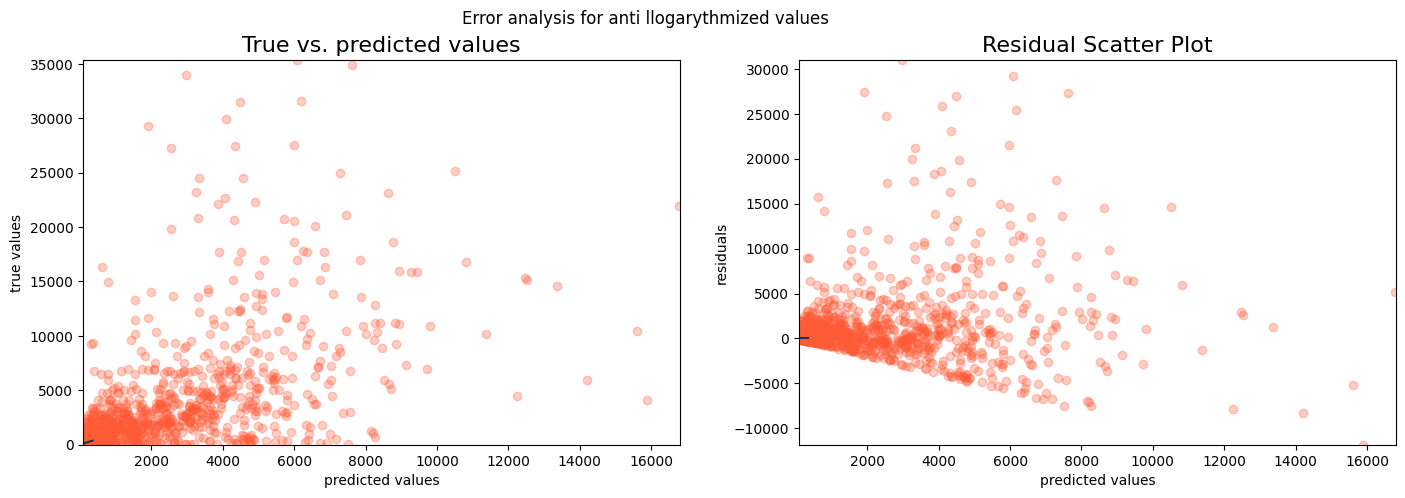

In [69]:
#Error analysis for anti lograthamised values
error_analysis.error_analysis(np.exp(y_test), np.exp(y_pred_test))
plt.suptitle('Error analysis for anti llogarythmized values');


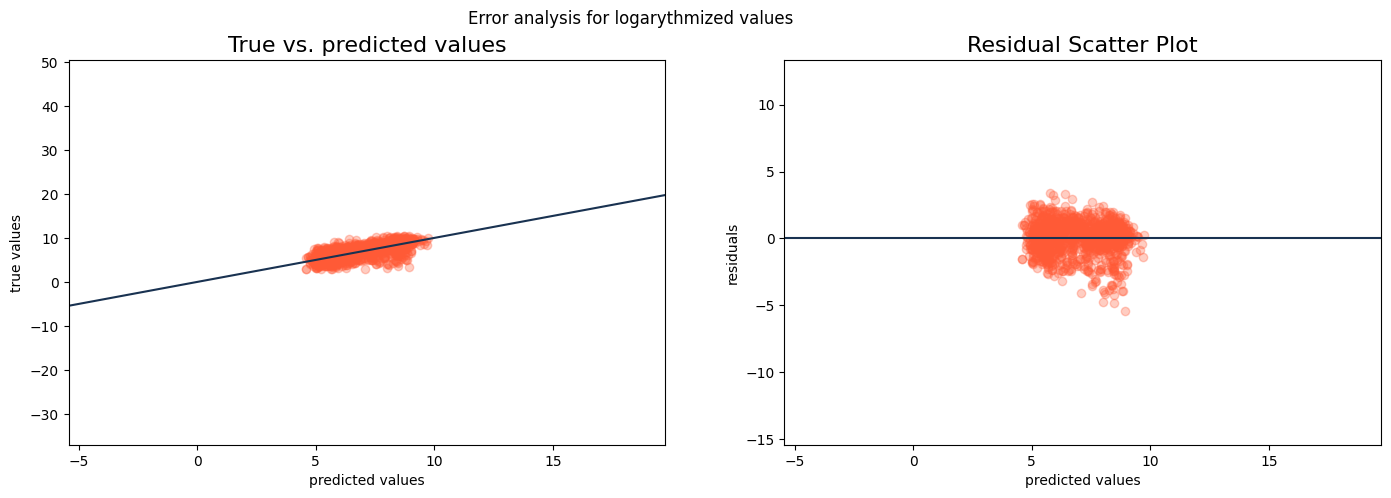

In [70]:
#Error analysis for lograthamised values
error_analysis.error_analysis(y_test, y_pred_test)
plt.suptitle('Error analysis for logarythmized values');

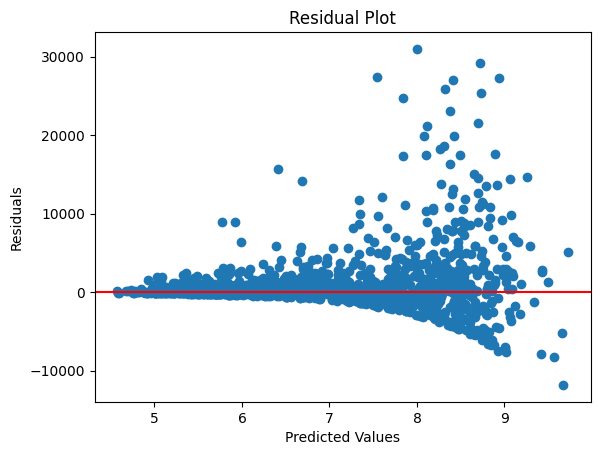

In [71]:
residuals = np.exp(y_test) - np.exp(y_pred_test)
plt.scatter(y_pred_test, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.show()

##### Discussion of results:

<b>For our baseline model we had the following results:</b><br>
<b>Metrics on training data</b><br>
RMSE Antilog 5.111758494448025<br>
Antilog of the mean of the y train set 1130.9565173435292<br>

<b>Metrics on test data</b>
RMSE Antilog 4.947654912757706<br>
Antilog of the mean of the y test set 1115.5110154415581<br>

<b>For our best model with all the features we have the following results:</b><br>
<b>Metrics on training data</b><br>
RMSE Antilog 3.144789044737104<br>
Antilog of the mean of the y train set 1130.9565173435292<br>

<b>Metrics on test data</b><br>
RMSE Antilog 3.2827822899996626<br>
Antilog of the mean of the y test set 1115.5110154415581<br>
<br>
Mean for y_train of our best model 1 is 1130.96, RMSE is 3.145 so our model is +/- 3.145$  off. <br> For test data y_test mean is 1115.51, RMSE is 3.283 so our model is +/- 3.283$ off.

## Regularization

### ElasticNet

In [72]:
#Elastic Net model - by default alpha is 1 and l1_ratio is 0.5
model_enet = ElasticNet(alpha = 0.005)
model_enet.fit(X_train_all, y_train) 
pred_train_enet= model_enet.predict(X_train_all)
pred_test_enet= model_enet.predict(X_test_all)

In [73]:
print("Elastic net with alpha=0.005:")
print("---"*10)
metrics.calculate_metrics(y_train,pred_train_enet, y_test, pred_test_enet)

Elastic net with alpha=0.005:
------------------------------
Metrics on training data
RMSE: 1.15
RMSE Antilog 3.158647302538701
R2: 0.537
Mean of the y train set 7.03081902917327
Antilog of the mean of the y train set 1130.9565173435292
Mean absolute error 0.869965542536139
Mean absolute error antilog 2.3868286080467955
------------------------------
Metrics on test data
RMSE: 1.185
RMSE Antilog 3.2704877181942242
R2: 0.487
Mean of the y test set 7.017067888715411
Antilog of the mean of the y test set 1115.5110154415581
Mean absolute error 0.8896720517086003
Mean absolute error antilog 2.4343311856162804
------------------------------


In [74]:
coef = pd.Series(model_enet.coef_, index = X_train.columns)
print("Elastic Net picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Elastic Net picked 43 variables and eliminated the other 9 variables


In [75]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Elastic Net Model')

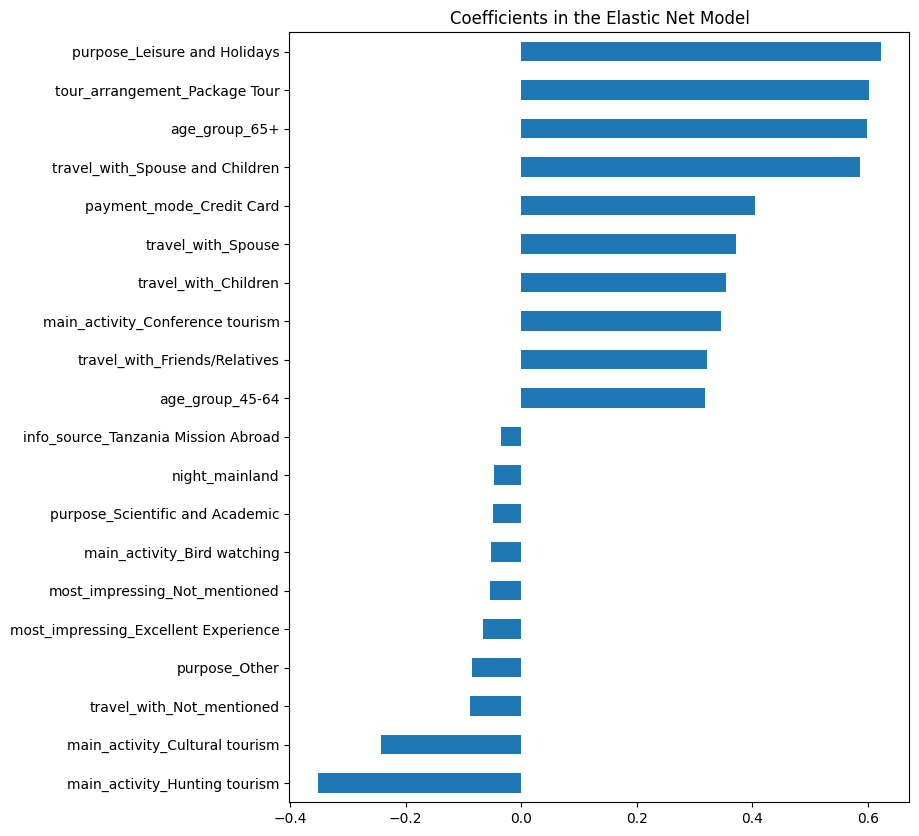

In [76]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Elastic Net Model")

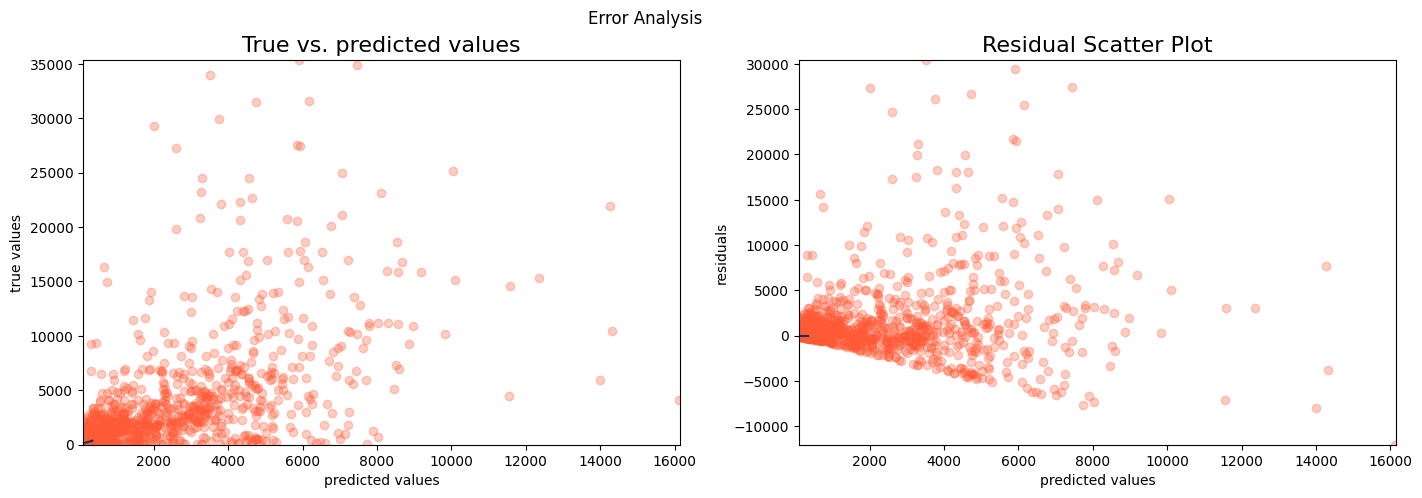

In [77]:
error_analysis.error_analysis(np.exp(y_test), np.exp(pred_test_enet))

#### Observation: using the ElasticNet with alpha of 0.005 didn't make our best model better

In [78]:
#trying out with alpha=1
model_enet2 = ElasticNet(l1_ratio=0.2)
model_enet2.fit(X_train_all, y_train) 
pred_train_enet2 = model_enet2.predict(X_train_all)
pred_test_enet2 = model_enet2.predict(X_test_all)


In [79]:
print("Elastic net with l1_ration=0.2:")
print("---"*10)
metrics.calculate_metrics(y_train,pred_train_enet2, y_test, pred_test_enet2)

Elastic net with l1_ration=0.2:
------------------------------
Metrics on training data
RMSE: 1.453
RMSE Antilog 4.274197080389323
R2: 0.261
Mean of the y train set 7.03081902917327
Antilog of the mean of the y train set 1130.9565173435292
Mean absolute error 1.1825532262022196
Mean absolute error antilog 3.2626939729841276
------------------------------
Metrics on test data
RMSE: 1.432
RMSE Antilog 4.188955804897892
R2: 0.251
Mean of the y test set 7.017067888715411
Antilog of the mean of the y test set 1115.5110154415581
Mean absolute error 1.1784063247629313
Mean absolute error antilog 3.2491919178468733
------------------------------


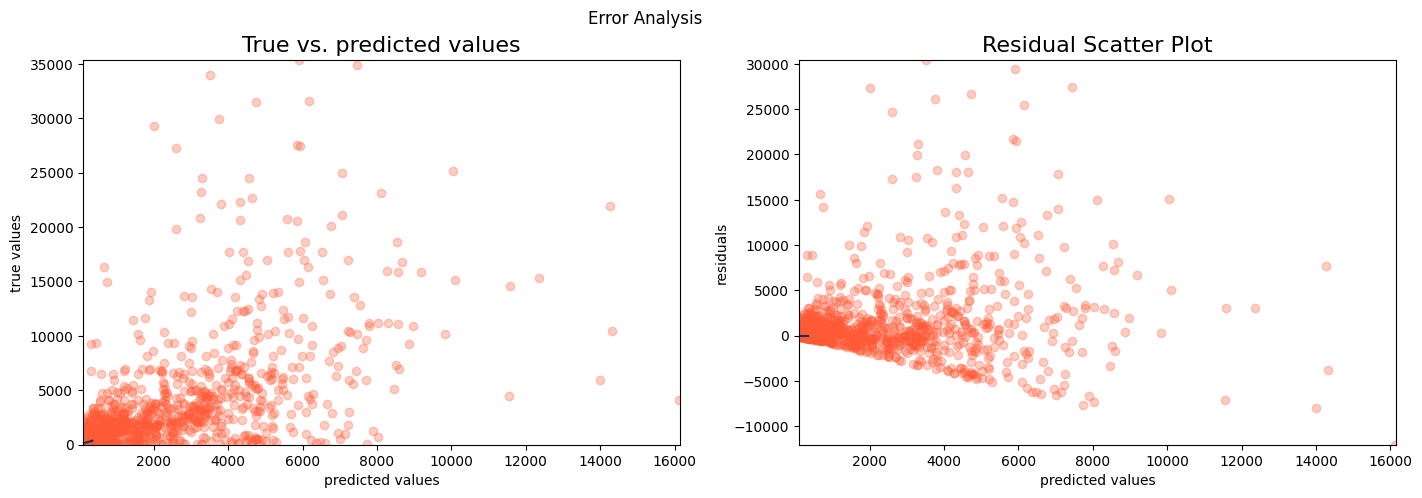

In [80]:
error_analysis.error_analysis(np.exp(y_test), np.exp(pred_test_enet))

In [81]:
coef2 = pd.Series(model_enet2.coef_, index = X_train.columns)
print("Elastic Net picked " + str(sum(coef2 != 0)) + " variables and eliminated the other " +  str(sum(coef2 == 0)) + " variables")

Elastic Net picked 11 variables and eliminated the other 41 variables


In [82]:
imp_coef2 = pd.concat([coef2.sort_values().head(10),
                     coef2.sort_values().tail(10)])

Text(0.5, 1.0, 'Coefficients in the Elastic Net Model')

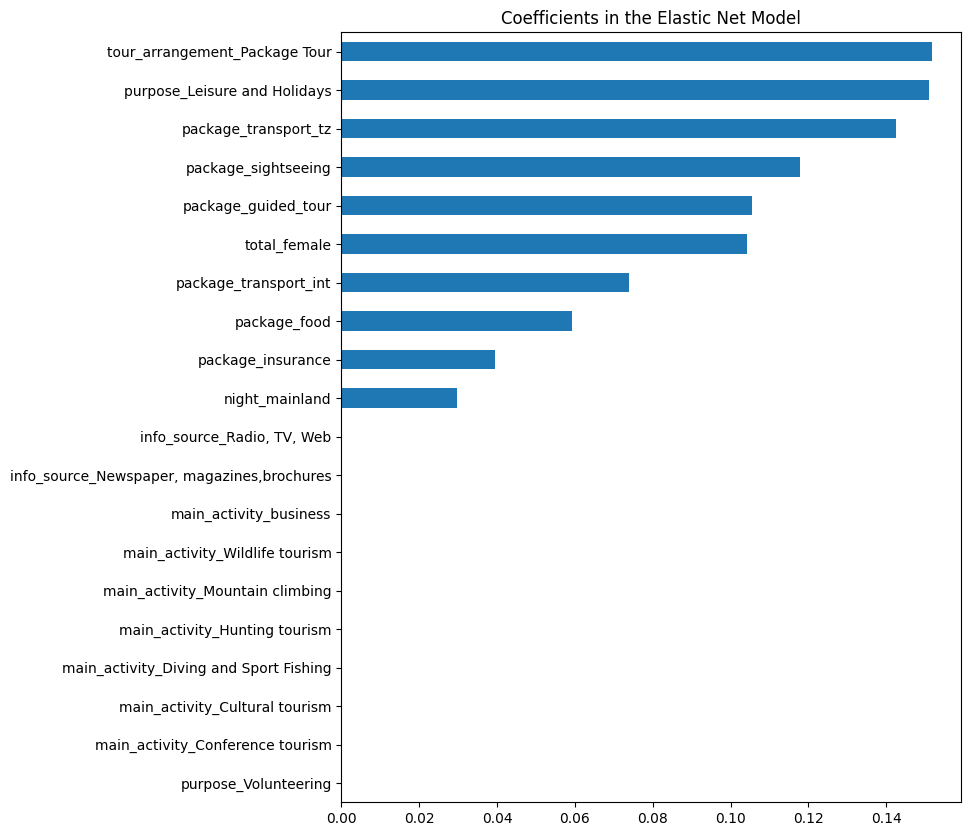

In [83]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef2.plot(kind = "barh")
plt.title("Coefficients in the Elastic Net Model")

#### Observation: RMSE Antilog and R squared both increased after changing alpha to default value

### Using cross validation to evaluate our ElasticNet Model

In [93]:
# define model evaluation method
model_enet_new = ElasticNet(alpha=1.0, l1_ratio=0.5)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model_enet_new, X_train_all, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 1.409 (0.042)


In [ ]:
#Antilog the RMSE
print("Antilog MAE:", (np.exp(1.409)))

Antilog MAE: 4.091861495962319


In [ ]:

model_enet_new.fit(X_train_all, y_train)

# make a prediction
yhat = model_enet_new.predict(X_test_all)
# summarize prediction
#print('Predicted: %.3f' % yhat)

In [ ]:
from sklearn.model_selection import GridSearchCV

# grid search hyperparameters for the elastic net
from numpy import arange
#model_e = ElasticNet()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = arange(0, 1, 0.01)
# define search
search = GridSearchCV(model_enet_new, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train_all, y_train)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Result: still the results don't change a lot after evaluate our ElasticNet Model with cross validation, so our first model and our ElasticNet Model are both almost the same and both very good<br> 
(RMSE train Antilog ElasticNet 5.089006326524787, RMSE test Antilog ElasticNet 4.922688113075679 vs <br>
RMSE train Antilog model1 3.144789044737104, RMSE test Antilog model1 3.2827822899996626)

### Elasticnetcv
Elastic Net model with iterative fitting along a regularization path. The scikit-learn library also provides a built-in version of the algorithm that automatically finds good hyperparameters via the ElasticNetCV class.

To use this class, it is first fit on the dataset, then used to make a prediction. It will automatically find appropriate hyperparameters.

By default, the model will test 100 alpha values and use a default ratio. We can specify our own lists of values to test via the “l1_ratio” and “alphas” arguments, as we did with the manual grid search.

In [96]:
# different cross validation of the ElasticNet Model by using ElasticNetCV

#enet_model = ElasticNet().fit(X_train_all, y_train)

#enet_model.intercept_

#y_pred_enet2 = enet_model.predict(X_test_all)

#np.sqrt(mean_squared_error(y_test,y_pred_enet2))

#r2_score(y_test,y_pred_enet2)

enet_cv_model = ElasticNetCV(cv = 60).fit(X_train_all,y_train)

# If we don't give the lambdas, what's the alpha?

enet_cv_model.alpha_

enet_cv_model.intercept_

enet_cv_model.coef_

# Let's create the final model according to optimum alpha.

enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train_all,y_train)

# Let's now calculate the error for the test set using this final model.

y_pred_enet_tuned = enet_tuned.predict(X_test_all)
y_pred_enet_train = enet_tuned.predict(X_train_all)

print("RMSE for test:", np.sqrt(mean_squared_error(y_test,y_pred_enet_tuned)))
print("Antilog RMSE:", (np.exp(1.184910931545086)))

print("RMSE for train:", np.sqrt(mean_squared_error(y_train,y_pred_enet_train)))
print("Antilog RMSE:", (np.exp(1.1463469197402572)))
# summarize chosen configuration
print('alpha: %f' % enet_cv_model.alpha_)
print('l1_ratio_: %f' % enet_cv_model.l1_ratio_)

RMSE for test: 1.1861917198630667
Antilog RMSE: 3.270395519417361
RMSE for train: 1.1463469197402572
Antilog RMSE: 3.146676824912743
alpha: 0.001425
l1_ratio_: 0.500000


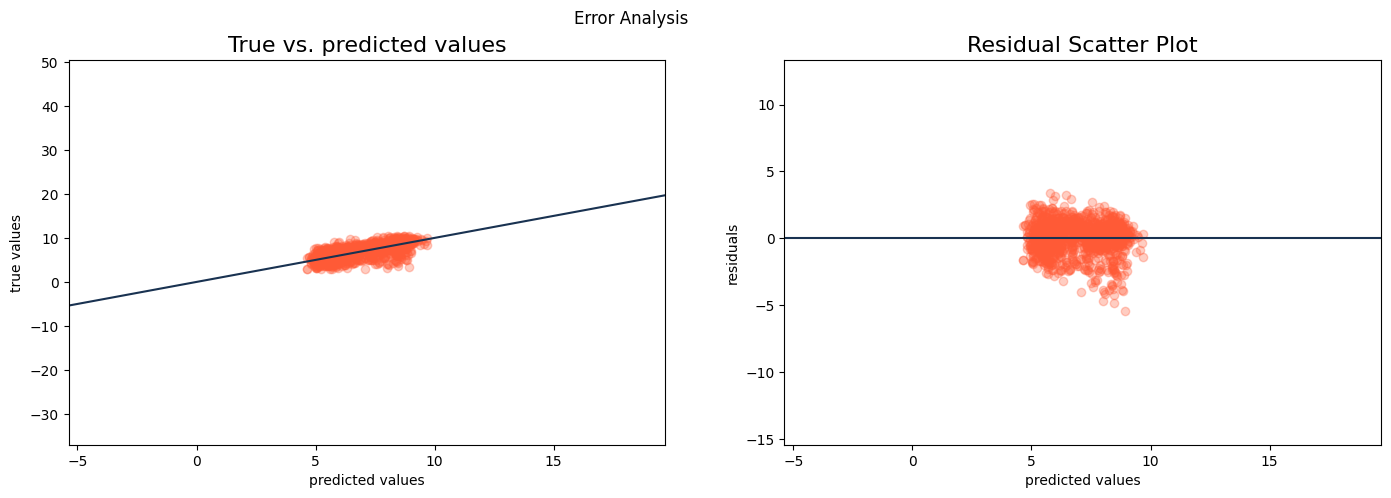

In [ ]:
error_analysis.error_analysis(y_test, y_pred_enet_tuned)

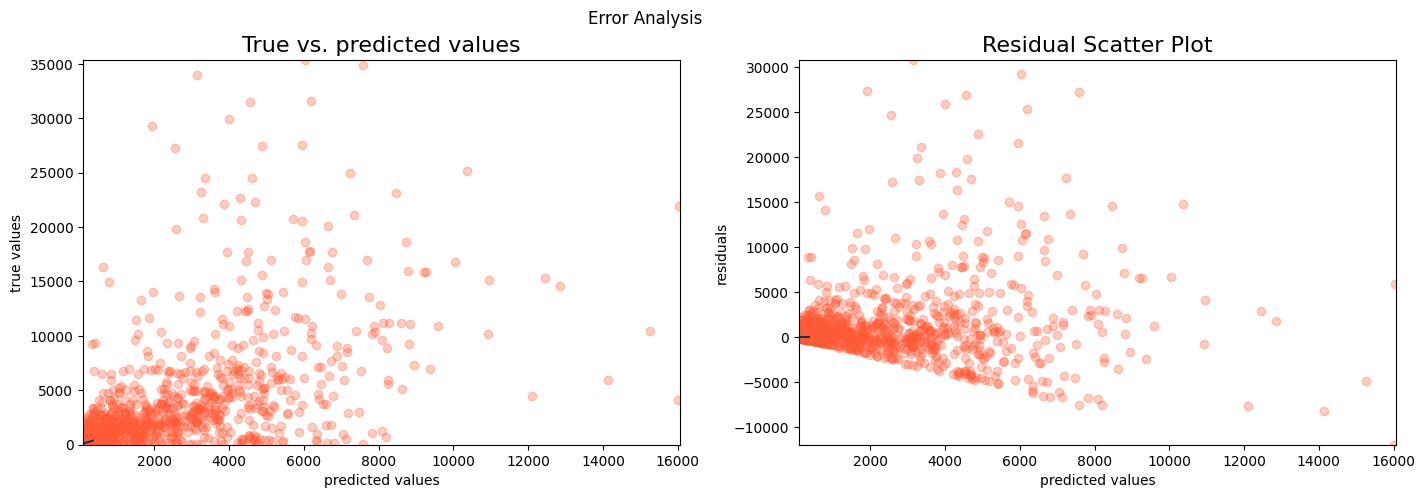

In [ ]:
error_analysis.error_analysis(np.exp(y_test), np.exp(y_pred_enet_tuned))

The residual plot is one of the most commonly used plots to visualize the regression model's errors. It shows the difference between the actual and predicted values (residuals) plotted against the predicted values.

A good regression model will have residuals randomly scattered around the zero line. If the residuals have a pattern or are not randomly distributed, it indicates that the model is not performing well.

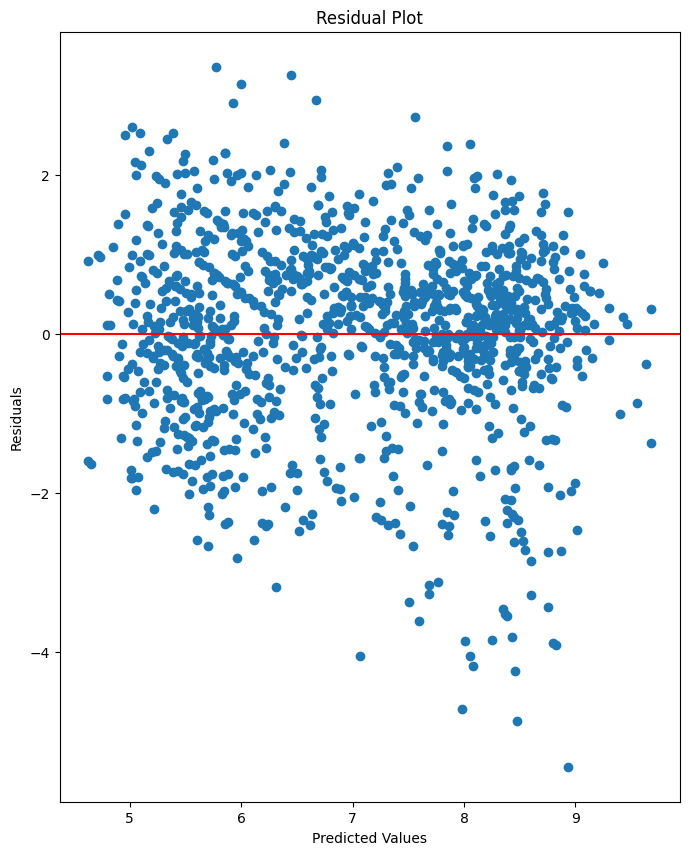

In [ ]:
residuals = y_test - y_pred_enet_tuned
plt.scatter(y_pred_enet_tuned, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.show()

#### Result: after using the ElasicNetCV method for cross validation on our ElasticNet model, the results of the RMSE gets better and are the best compared to the others:<br>

RMSE train Antilog ElasticNet 5.089006326524787, RMSE test Antilog ElasticNet 4.922688113075679 vs <br>
RMSE train Antilog best model 3.144789044737104, RMSE test Antilog best model 3.2827822899996626